In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

In [6]:
BSinfo = pd.read_csv('Dataset/BSinfo.csv')
CLdata = pd.read_csv('Dataset/CLdata.csv')
ECdata = pd.read_csv('Dataset/ECdata.csv')


In [7]:
# Define the WMAPE function
def wmape(y_true, y_pred):
    weights = np.abs(y_true)
    wmape = np.sum(np.abs(y_true - y_pred) / weights) * 100.0 / np.sum(weights)
    return wmape

In [14]:
ECdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    92629 non-null  object 
 1   BS      92629 non-null  object 
 2   Energy  92629 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.1+ MB


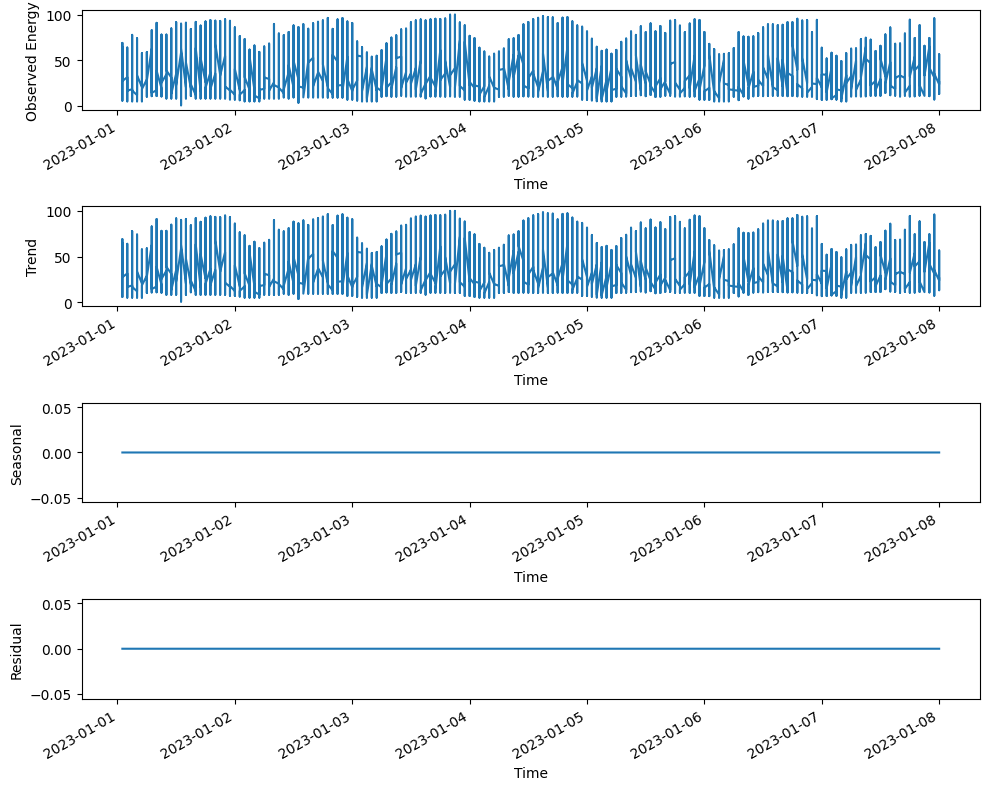

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset using pandas
data = pd.read_csv('Dataset/ECdata.csv', parse_dates=['Time'], index_col='Time')

# Assuming 'BS' columns contain values like 'B_0', 'B_1', etc.
# Replace 'BS' with the actual column name in your dataset

# Perform seasonal decomposition on 'Energy' column
result = seasonal_decompose(data['Energy'], model='additive', period=1)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
data['Energy'].plot(ax=ax1)
ax1.set_ylabel('Observed Energy')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()


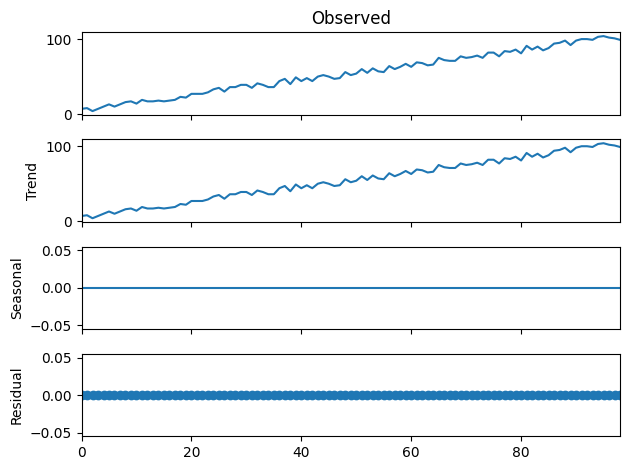

In [20]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset using pandas
data = pd.read_csv('Dataset/ECdata.csv', parse_dates=['Time'], index_col='Time')
# print(data.head())
# data_filtered = data.loc[data['BS'] == 'B_0']
# # Resample data to ensure hourly frequency
# data_resampled = data_filtered.resample('H').mean()  # Change 'H' to 'D' if you want daily frequency

# # Interpolate missing values
# data_interpolated = data_resampled.interpolate(method='linear')  # You can use other interpolation methods as well

# # Perform seasonal decomposition on interpolated data
# result = seasonal_decompose(data_interpolated['Energy'], model='additive', period=24)  # Assuming 24 hours in a day

# # Plot the decomposed components
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
# data_interpolated['Energy'].plot(ax=ax1)
# ax1.set_ylabel('Observed Energy')
# result.trend.plot(ax=ax2)
# ax2.set_ylabel('Trend')
# result.seasonal.plot(ax=ax3)
# ax3.set_ylabel('Seasonal')
# result.resid.plot(ax=ax4)
# ax4.set_ylabel('Residual')
# plt.tight_layout()
# plt.show()

data.head()

,BS,Energy
Time,,
2023-01-01 01:00:00,B_0,64.275037
2023-01-01 02:00:00,B_0,55.904335
2023-01-01 03:00:00,B_0,57.698057
2023-01-01 04:00:00,B_0,55.156951
2023-01-01 05:00:00,B_0,56.053812


In [28]:
FilteredData = data[data["BS"] == "B_0"].head()
BS1Data = FilteredData.drop(['BS'], axis=1)
BS1Data

,Energy
Time,
2023-01-01 01:00:00,64.275037
2023-01-01 02:00:00,55.904335
2023-01-01 03:00:00,57.698057
2023-01-01 04:00:00,55.156951
2023-01-01 05:00:00,56.053812


In [29]:
# Resample data to ensure hourly frequency
data_resampled = BS1Data.resample('H').mean()  # Change 'H' to 'D' if you want daily frequency

# Interpolate missing values
data_interpolated = data_resampled.interpolate(method='linear')  # You can use other interpolation methods as well

# Perform seasonal decomposition on interpolated data
result = seasonal_decompose(data_interpolated['Energy'], model='additive', period=24)  # Assuming 24 hours in a day

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
data_interpolated['Energy'].plot(ax=ax1)
ax1.set_ylabel('Observed Energy')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

ValueError: x must have 2 complete cycles requires 48 observations. x only has 5 observation(s)